In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf

tf.random.set_seed(seed)
import os

os.environ['PATH'] = os.environ['XILINX_VIVADO'] + '/bin:' + os.environ['PATH']

2024-05-09 03:38:50.443713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 03:38:50.569717: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.1


In [32]:
!pip install opencv-python
import cv2
import os
import numpy as np

# Tamaño deseado para todas las imágenes
nuevo_ancho = 60
nuevo_alto = 60

# Ruta a la carpeta de imágenes
data_dir = "./signals"

# Función para cargar imágenes y etiquetas de una sola carpeta
def load_images_and_labels(directory):
    images = []
    labels = []
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path):
            for image_file in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_file)
                # Leer la imagen en escala de grises
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                # Redimensionar la imagen
                image = cv2.resize(image, (nuevo_ancho, nuevo_alto))
                # Normalizar la imagen
                image = image / 255.0
                images.append(image)
                # Usar el nombre de la carpeta como etiqueta
                labels.append(folder_name)
    return np.array(images), np.array(labels)

# Cargar imágenes y etiquetas de la carpeta de datos
images, labels = load_images_and_labels(data_dir)

# Crear un diccionario con los datos
data = {'data': images, 'target': labels}

# Organizar los datos según la estructura deseada
X, y = data['data'], data['target']

# Verificar las dimensiones de los datos cargados
print("Dimensiones de las imágenes:", X.shape)
print("Dimensiones de las etiquetas:", y.shape)


Dimensiones de las imágenes: (40, 60, 60)
Dimensiones de las etiquetas: (40,)


In [33]:
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(40, 60, 60) (40,)
[[[0.79215686 0.8627451  0.89411765 ... 0.10588235 0.2745098  0.85098039]
  [0.6745098  0.81176471 0.89019608 ... 0.11764706 0.26666667 0.83137255]
  [0.60784314 0.7372549  0.8745098  ... 0.10980392 0.34901961 0.81960784]
  ...
  [0.4        0.40784314 0.38039216 ... 0.54117647 0.66666667 0.67058824]
  [0.52156863 0.36862745 0.37254902 ... 0.53333333 0.68235294 0.67843137]
  [0.54901961 0.65098039 0.55294118 ... 0.52156863 0.68235294 0.69019608]]

 [[0.22745098 0.19607843 0.14901961 ... 0.8627451  0.39215686 0.8627451 ]
  [0.25490196 0.24313725 0.24705882 ... 0.64705882 0.49803922 0.60784314]
  [0.32156863 0.25882353 0.20392157 ... 0.33333333 0.45490196 0.76862745]
  ...
  [0.10196078 0.05098039 0.37647059 ... 0.4745098  0.35686275 0.55686275]
  [0.23921569 0.11372549 0.43529412 ... 0.62352941 0.77647059 0.81568627]
  [0.18823529 0.15686275 0.49411765 ... 0.6745098  0.83921569 0.88235294]]

 [[0.31764706 0.30980392 0.28235294 ... 0.34509804 0.29411765 0.49803922]
  [

In [34]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, 5)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y[:5])

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [41]:
from sklearn.preprocessing import StandardScaler

# Aplanar cada imagen
X_train_val_flat = X_train_val.reshape(X_train_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Escalar cada dimensión por separado
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Remodelar los datos escalados a su forma original
# X_train_val_scaled = X_train_val_scaled.reshape(X_train_val.shape)
# X_test_scaled = X_test_scaled.reshape(X_test.shape)

In [42]:
np.save('X_train_val.npy', X_train_val)
np.save('X_test.npy', X_test)
np.save('y_train_val.npy', y_train_val)
np.save('y_test.npy', y_test)
np.save('classes.npy', le.classes_)
print(le.classes_)

['ceda_el_paso' 'no_estacionarse']


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from callbacks import all_callbacks

In [44]:
model = Sequential()
model.add(Dense(64, input_shape=(16,), name='fc1', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(32, name='fc2', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(32, name='fc3', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(2, name='output', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='softmax', name='softmax'))

In [47]:
train = True
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input

# Define the model
model = Sequential([
    Input(shape=(60, 60)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

if train:
    adam = Adam(lr=0.0001)
    model.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
    callbacks = all_callbacks(
        stop_patience=1000,
        lr_factor=0.5,
        lr_patience=10,
        lr_epsilon=0.000001,
        lr_cooldown=2,
        lr_minimum=0.0000001,
        outputDir='model_1',
    )
    model.fit(
        X_train_val,
        y_train_val,
        batch_size=1024,
        epochs=30,
        validation_split=0.25,
        shuffle=True,
        callbacks=callbacks.callbacks,
    )
else:
    from tensorflow.keras.models import load_model

    model = load_model('model_1/KERAS_check_best_model.h5')

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 2.1365 - accuracy: 0.1250
***callbacks***
saving losses to model_1/losses.log

Epoch 1: val_loss improved from inf to 1.26035, saving model to model_1/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.26035, saving model to model_1/KERAS_check_best_model_weights.h5

Epoch 1: saving model to model_1/KERAS_check_model_last.h5

Epoch 1: saving model to model_1/KERAS_check_model_last_weights.h5

***callbacks end***

1/1 [==============================] - 0s 433ms/step - loss: 2.1365 - accuracy: 0.1250 - val_loss: 1.2604 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 1.8692 - accuracy: 0.5000
***callbacks***
saving losses to model_1/losses.log

Epoch 2: val_loss did not improve from 1.26035

Epoch 2: val_loss did not improve from 1.26035

Epoch 2: saving model to model_1/KERAS_check_model_last.h5

Epoch 2: saving model to model_1/KERAS_check_model_last_w

1/1 [==============================] - 0s 48ms/step
Accuracy: 0.875


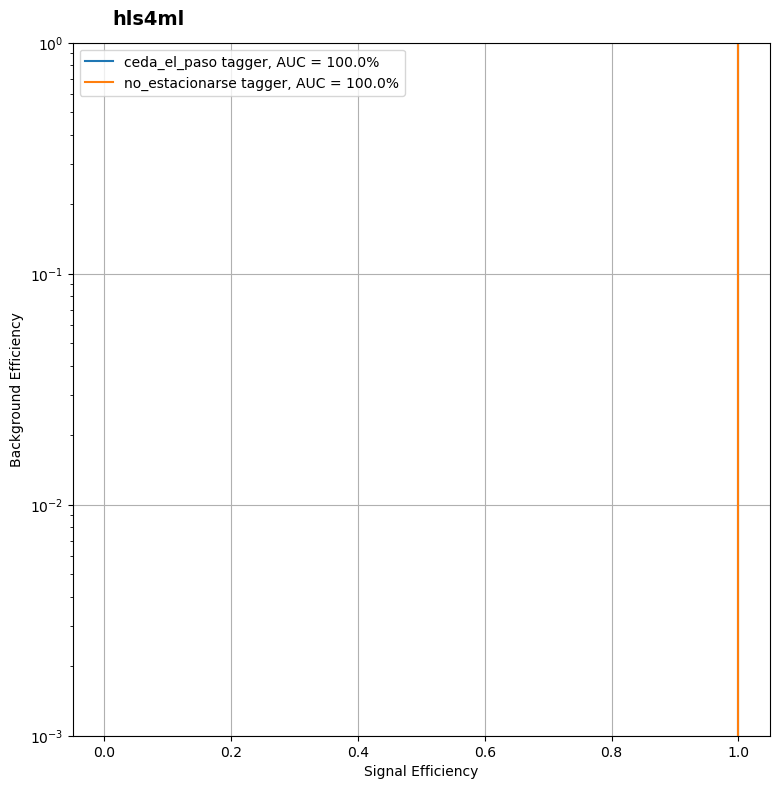

In [48]:
import plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_keras = model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
plt.figure(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_keras, le.classes_)

In [50]:
import hls4ml

config = hls4ml.utils.config_from_keras_model(model, granularity='model')
print("-----------------------------------")
print("Configuration")
plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(
    model, hls_config=config, output_dir='model_1/hls4ml_prj', part='xcu250-figd2104-2L-e'
)

Interpreting Sequential
Topology:
Layer name: input_2, layer type: InputLayer, input shapes: [[None, 60, 60]], output shape: [None, 60, 60]
Layer name: flatten_7, layer type: Reshape, input shapes: [[None, 60, 60]], output shape: [None, 3600]
Layer name: dense_13, layer type: Dense, input shapes: [[None, 3600]], output shape: [None, 128]
Layer name: dense_14, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 5]
-----------------------------------
Configuration
Model
  Precision:         fixed<16,6>
  ReuseFactor:       1
  Strategy:          Latency
  BramFactor:        1000000000
  TraceOutput:       False
-----------------------------------
Interpreting Sequential
Topology:
Layer name: input_2, layer type: InputLayer, input shapes: [[None, 60, 60]], output shape: [None, 60, 60]
Layer name: flatten_7, layer type: Reshape, input shapes: [[None, 60, 60]], output shape: [None, 3600]
Layer name: dense_13, layer type: Dense, input shapes: [[None, 3600]], output shape: [N

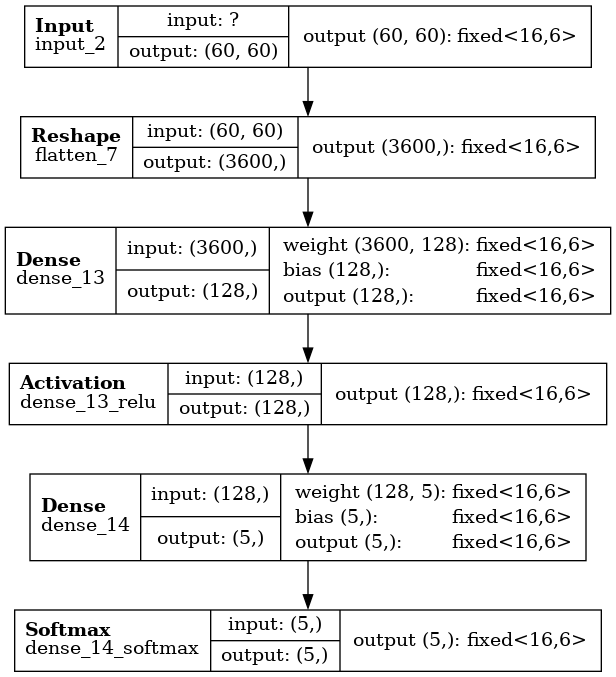

In [51]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [52]:
hls_model.compile()
X_test = np.ascontiguousarray(X_test)
y_hls = hls_model.predict(X_test)

Writing HLS project
Done


Keras  Accuracy: 0.875
hls4ml Accuracy: 0.875


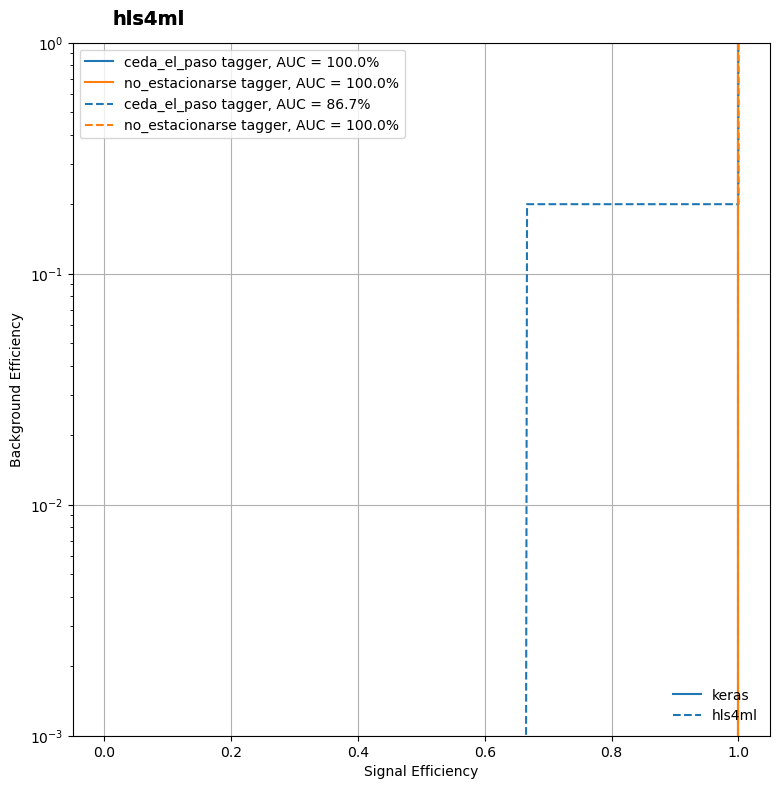

In [53]:
print("Keras  Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
print("hls4ml Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls, axis=1))))

fig, ax = plt.subplots(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_keras, le.classes_)
plt.gca().set_prop_cycle(None)  # reset the colors
_ = plotting.makeRoc(y_test, y_hls, le.classes_, linestyle='--')

from matplotlib.lines import Line2D

lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend

leg = Legend(ax, lines, labels=['keras', 'hls4ml'], loc='lower right', frameon=False)
ax.add_artist(leg)

In [ ]:
hls_model.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /opt/Xilinx/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/opt/Xilinx/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'jovyan' on host 'd132659213db' (Linux_x86_64 version 6.5.0-28-generic) on Thu May 09 04:10:36 UTC 2024
INFO: [HLS 200-10] In directory '/home/jovyan/HLS4ML/model_1/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Creating and opening project '/home/jovyan/HLS4ML/model_1/hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Adding tes

In [ ]:
hls4ml.report.read_vivado_report('model_1/hls4ml_prj/')